In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import pickle
import matplotlib.pyplot as plt
from IPython.display import display
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report
from comparers import ModelComparer, plot_decision_boundary
from util import RuleClassifier, find_counterfactuals, counterfactuals_to_constraint_matrix,\
                 evaluate_counterfactual_fidelity, print_complexity
from surrogate_tree import train_surrogate_tree, tree_to_rules, plot_surrogate_tree,\
                 get_feature_importances, plot_feature_importances, plot_tree_leafs_for_class,\
                 tree_to_constraint_matrix, constraint_matrix_to_rules, extract_rules, print_rules,\
                 evaluate
from tasks.gaussian_quantiles import make_task

In [2]:
clf_a, clf_b, X, y, feature_names, feature_precisions = make_task()

In [3]:
comparer = ModelComparer(clf_a, clf_b, feature_names)

# Explanations

In [4]:
mclass_diff = comparer.predict_mclass_diff(X)

In [40]:
with open('ground_truth.(0, 1).pickle', 'rb') as f:
    ground_truth_instance_indices_01, ground_truth_01 = pickle.load(f)
with open('ground_truth.(1, 0).pickle', 'rb') as f:
    ground_truth_instance_indices_10, ground_truth_10 = pickle.load(f)

## Tree with Depth 2

In [7]:
%%time
model = train_surrogate_tree(X, mclass_diff, max_depth=2)

CPU times: user 1.49 ms, sys: 895 µs, total: 2.38 ms
Wall time: 2.83 ms


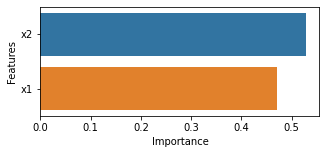

In [8]:
feature_importances, feature_order = get_feature_importances(model)
plot_feature_importances(feature_names, feature_importances, feature_order)

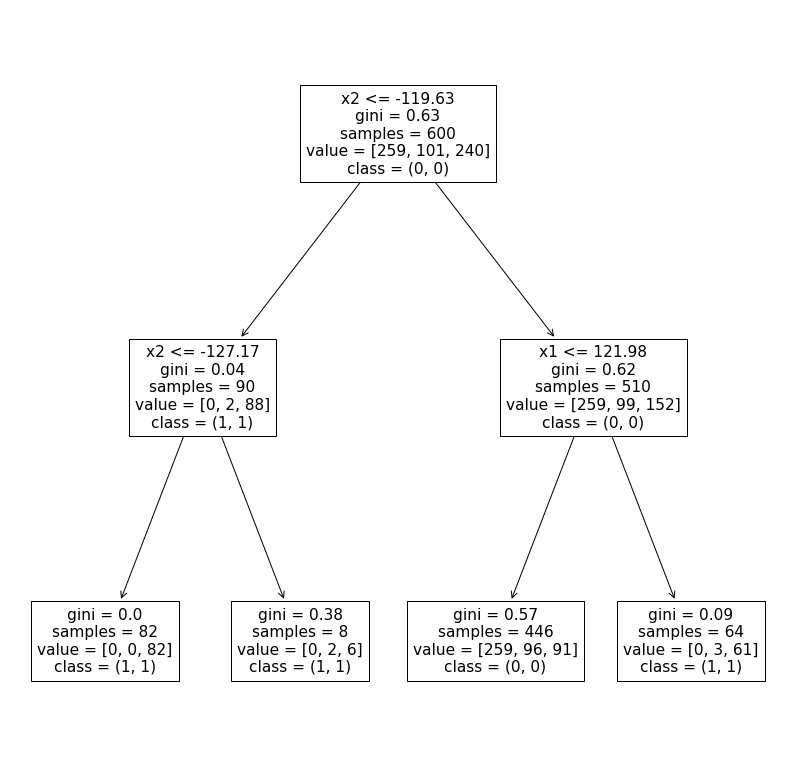

In [9]:
plot_surrogate_tree(model, feature_names, comparer.class_names, precision=2)

In [13]:
constraints, rules, class_occurences, labels, instance_indices_per_rule =\
    extract_rules(model, feature_names, comparer.difference_classes, X, mclass_diff)
print_rules(rules, class_occurences, comparer.class_names, labels)

In [14]:
evaluate(model, X, mclass_diff, comparer.class_names)

              precision    recall  f1-score   support

      (0, 0)       0.58      1.00      0.73       259
      (1, 0)       0.00      0.00      0.00       101
      (1, 1)       0.97      0.62      0.76       240

    accuracy                           0.68       600
   macro avg       0.52      0.54      0.50       600
weighted avg       0.64      0.68      0.62       600



Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


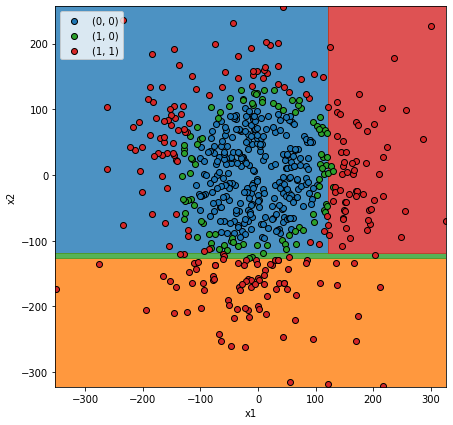

In [15]:
plot_tree_leafs_for_class(model, comparer.class_names, comparer.difference_class_names, X, mclass_diff, comparer.class_names, feature_names)

This tree does not contain any explanations.

## Tree with Depth 3

In [16]:
%%time
model = train_surrogate_tree(X, mclass_diff, max_depth=3)

CPU times: user 1.35 ms, sys: 112 µs, total: 1.46 ms
Wall time: 3.03 ms


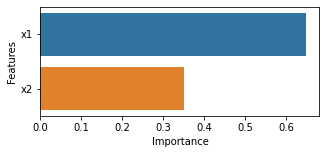

In [17]:
feature_importances, feature_order = get_feature_importances(model)
plot_feature_importances(feature_names, feature_importances, feature_order)

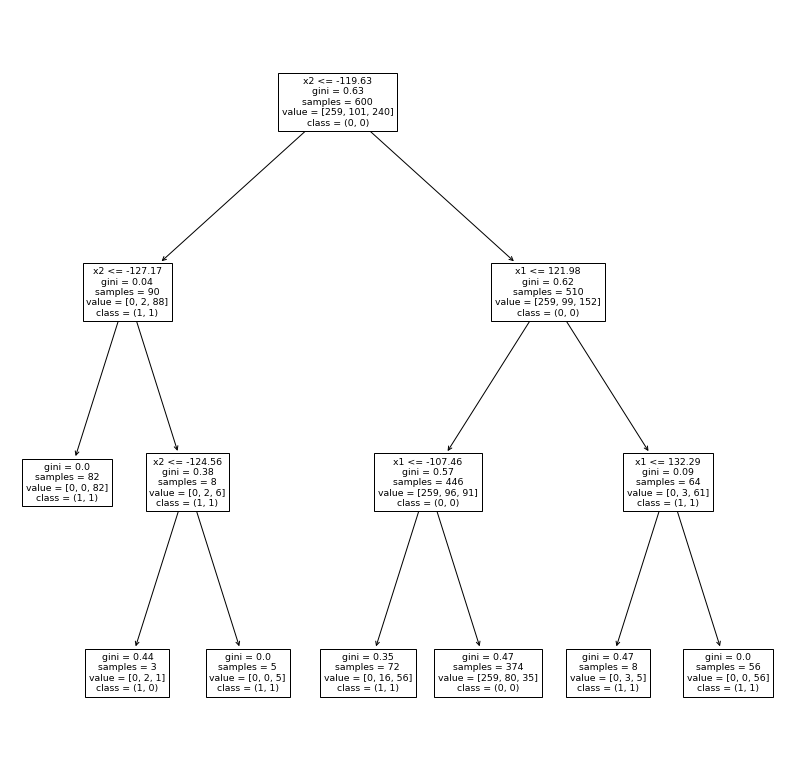

In [18]:
plot_surrogate_tree(model, feature_names, comparer.class_names, precision=2)

In [19]:
constraints, rules, class_occurences, labels, instance_indices_per_rule =\
    extract_rules(model, feature_names, comparer.difference_classes, X, mclass_diff)
print_rules(rules, class_occurences, comparer.class_names, labels)

1. -127.1684799194336 < x2 <= -124.55886840820312 => (1, 0) [0, 2, 1]


In [20]:
evaluate(model, X, mclass_diff, comparer.class_names)

              precision    recall  f1-score   support

      (0, 0)       0.69      1.00      0.82       259
      (1, 0)       0.67      0.02      0.04       101
      (1, 1)       0.91      0.85      0.88       240

    accuracy                           0.78       600
   macro avg       0.76      0.62      0.58       600
weighted avg       0.78      0.78      0.71       600



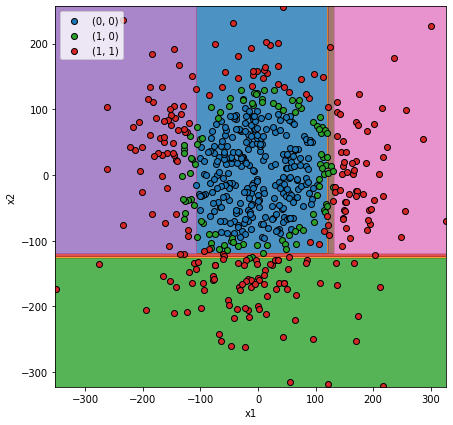

In [21]:
plot_tree_leafs_for_class(model, comparer.class_names, comparer.difference_class_names, X, mclass_diff, comparer.class_names, feature_names)

This explanation has low recall. Proceeding to the next explanation.

## Tree with Depth 4

In [22]:
%%time
model = train_surrogate_tree(X, mclass_diff, max_depth=4)

CPU times: user 1.77 ms, sys: 140 µs, total: 1.91 ms
Wall time: 5.98 ms


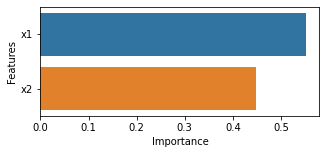

In [23]:
feature_importances, feature_order = get_feature_importances(model)
plot_feature_importances(feature_names, feature_importances, feature_order)

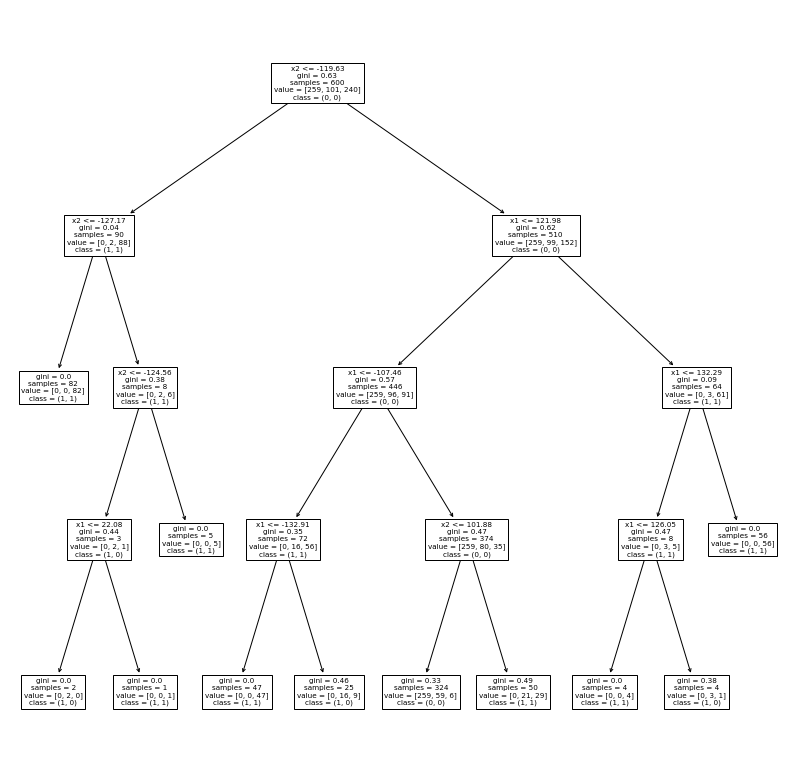

In [24]:
plot_surrogate_tree(model, feature_names, comparer.class_names, precision=2)

In [25]:
constraints, rules, class_occurences, labels, instance_indices_per_rule =\
    extract_rules(model, feature_names, comparer.difference_classes, X, mclass_diff)
print_rules(rules, class_occurences, comparer.class_names, labels)

1. -132.90563201904297 < x1 <= -107.45850372314453 and x2 > -119.63118362426758 => (1, 0) [0, 16, 9]
2. 126.05499649047852 < x1 <= 132.28627014160156 and x2 > -119.63118362426758 => (1, 0) [0, 3, 1]
3. x1 <= 22.08045196533203 and -127.1684799194336 < x2 <= -124.55886840820312 => (1, 0) [0, 2, 0]


In [26]:
evaluate(model, X, mclass_diff, comparer.class_names)

              precision    recall  f1-score   support

      (0, 0)       0.80      1.00      0.89       259
      (1, 0)       0.68      0.21      0.32       101
      (1, 1)       0.91      0.93      0.92       240

    accuracy                           0.84       600
   macro avg       0.80      0.71      0.71       600
weighted avg       0.82      0.84      0.81       600



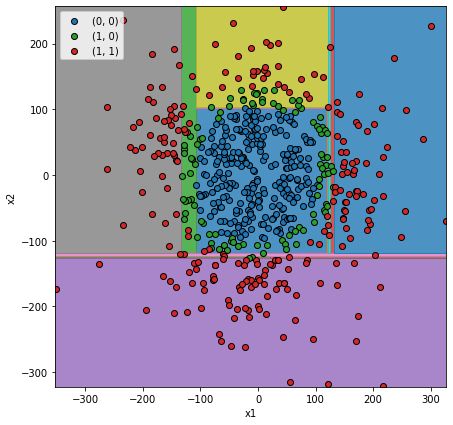

In [27]:
plot_tree_leafs_for_class(model, comparer.class_names, comparer.difference_class_names, X, mclass_diff, comparer.class_names, feature_names)

Still very low on recall.

## Tree with Depth 5

In [28]:
%%time
model = train_surrogate_tree(X, mclass_diff, max_depth=5)

CPU times: user 2.45 ms, sys: 1.64 ms, total: 4.09 ms
Wall time: 2.66 ms


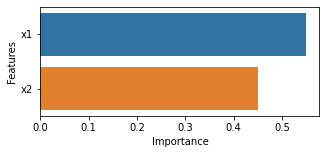

In [29]:
feature_importances, feature_order = get_feature_importances(model)
plot_feature_importances(feature_names, feature_importances, feature_order)

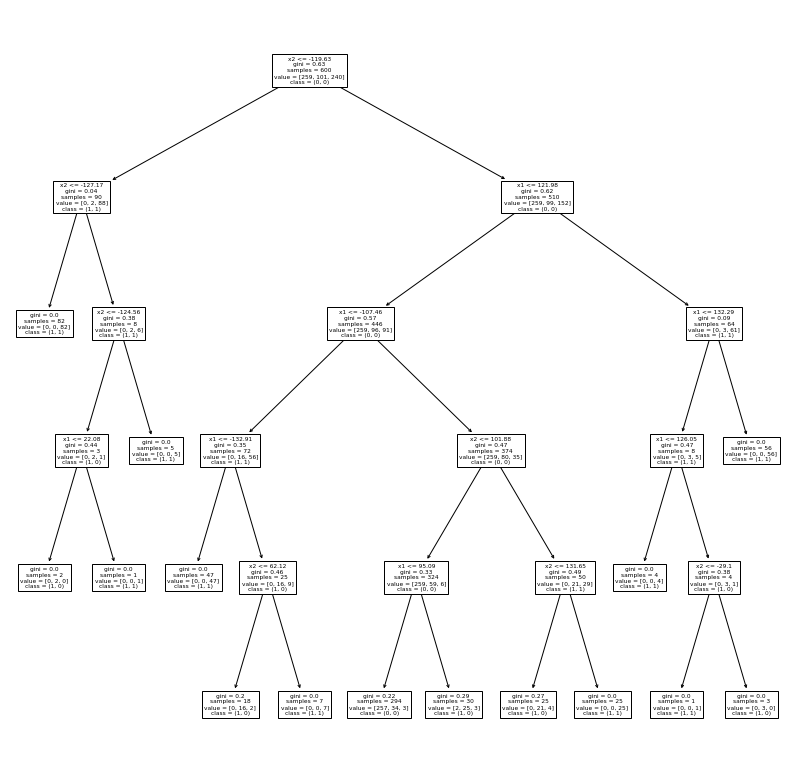

In [30]:
plot_surrogate_tree(model, feature_names, comparer.class_names, precision=2)

In [31]:
constraints, rules, class_occurences, labels, instance_indices_per_rule =\
    extract_rules(model, feature_names, comparer.difference_classes, X, mclass_diff)
print_rules(rules, class_occurences, comparer.class_names, labels)

1. 95.08567428588867 < x1 <= 121.97781753540039 and -119.63118362426758 < x2 <= 101.87789916992188 => (1, 0) [2, 25, 3]
2. -107.45850372314453 < x1 <= 121.97781753540039 and 101.87789916992188 < x2 <= 131.65448760986328 => (1, 0) [0, 21, 4]
3. -132.90563201904297 < x1 <= -107.45850372314453 and -119.63118362426758 < x2 <= 62.12141036987305 => (1, 0) [0, 16, 2]
4. 126.05499649047852 < x1 <= 132.28627014160156 and x2 > -29.100274085998535 => (1, 0) [0, 3, 0]
5. x1 <= 22.08045196533203 and -127.1684799194336 < x2 <= -124.55886840820312 => (1, 0) [0, 2, 0]


In [32]:
evaluate(model, X, mclass_diff, comparer.class_names)

              precision    recall  f1-score   support

      (0, 0)       0.87      0.99      0.93       259
      (1, 0)       0.86      0.66      0.75       101
      (1, 1)       1.00      0.95      0.97       240

    accuracy                           0.92       600
   macro avg       0.91      0.87      0.88       600
weighted avg       0.92      0.92      0.92       600



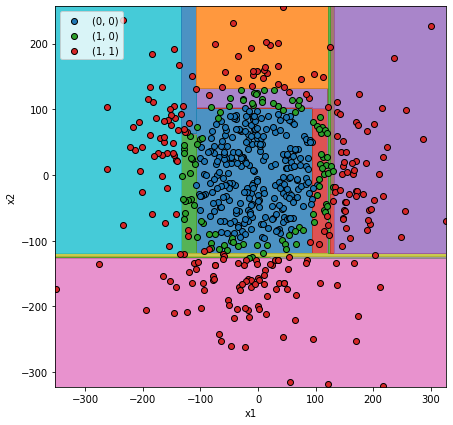

In [33]:
plot_tree_leafs_for_class(model, comparer.class_names, comparer.difference_class_names, X, mclass_diff, comparer.class_names, feature_names)

66\% recall is now acceptable, covering the majority of instances classified differently.

### Evaluation

In [34]:
constraints_10 = [constraint for constraint, label in zip(constraints, labels) if label == comparer.check_class('(1, 0)')[0]]

In [35]:
instance_indices_per_rule_10 = [dataset for dataset, label in zip(instance_indices_per_rule, labels) if label == comparer.check_class('(1, 0)')[0]]

#### Global Fidelity

In [36]:
evaluate(model, X, mclass_diff, comparer.class_names)

              precision    recall  f1-score   support

      (0, 0)       0.87      0.99      0.93       259
      (1, 0)       0.86      0.66      0.75       101
      (1, 1)       1.00      0.95      0.97       240

    accuracy                           0.92       600
   macro avg       0.91      0.87      0.88       600
weighted avg       0.92      0.92      0.92       600



#### Counterfactual Fidelity Error

In [41]:
errors, rmse, boundary_miss_rate, boundary_add_rate = \
    evaluate_counterfactual_fidelity(comparer, ground_truth_instance_indices_10, ground_truth_10, instance_indices_per_rule_10, constraints_10)

In [42]:
rmse

x1    32.854275
x2    42.835034
dtype: float64

In [43]:
boundary_miss_rate

x1    0.014925
x2    0.022388
dtype: float64

In [44]:
boundary_add_rate

x1    0.0
x2    0.0
dtype: float64

#### Complexity

In [45]:
print_complexity(constraints_10)

Number of rules: 5
Number of constraints: 18 (3.6 per rule)


## Tree with Depth 6

In [46]:
%%time
model = train_surrogate_tree(X, mclass_diff, max_depth=6)

CPU times: user 3.06 ms, sys: 2.51 ms, total: 5.57 ms
Wall time: 6.03 ms


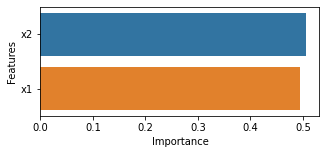

In [47]:
feature_importances, feature_order = get_feature_importances(model)
plot_feature_importances(feature_names, feature_importances, feature_order)

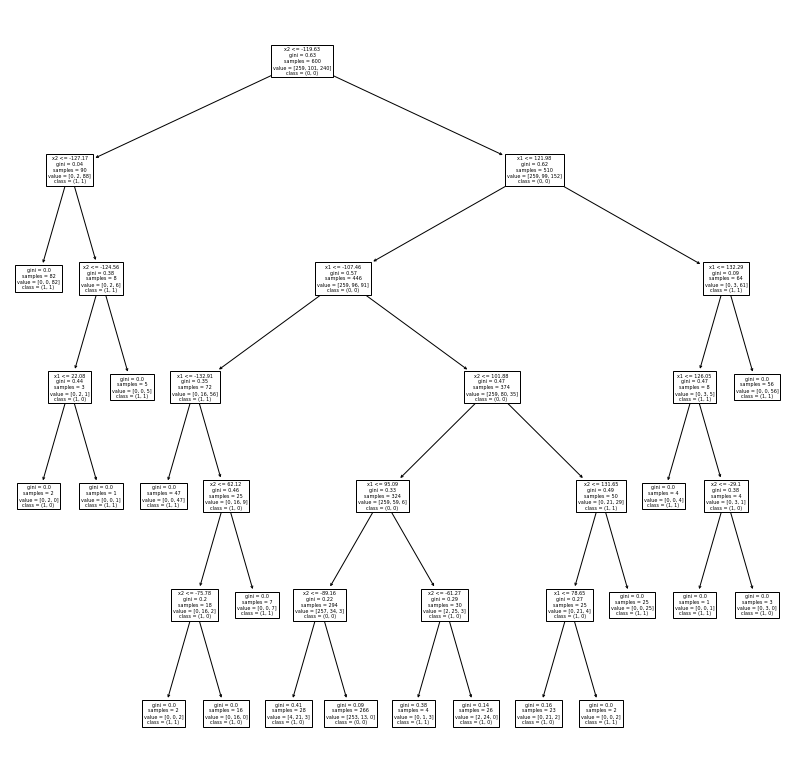

In [48]:
plot_surrogate_tree(model, feature_names, comparer.class_names, precision=2)

In [49]:
constraints, rules, class_occurences, labels, instance_indices_per_rule =\
    extract_rules(model, feature_names, comparer.difference_classes, X, mclass_diff)
print_rules(rules, class_occurences, comparer.class_names, labels)

1. -107.45850372314453 < x1 <= 95.08567428588867 and -119.63118362426758 < x2 <= -89.15727615356445 => (1, 0) [4, 21, 3]
2. 95.08567428588867 < x1 <= 121.97781753540039 and -61.269941329956055 < x2 <= 101.87789916992188 => (1, 0) [2, 24, 0]
3. -107.45850372314453 < x1 <= 78.654296875 and 101.87789916992188 < x2 <= 131.65448760986328 => (1, 0) [0, 21, 2]
4. -132.90563201904297 < x1 <= -107.45850372314453 and -75.77922058105469 < x2 <= 62.12141036987305 => (1, 0) [0, 16, 0]
5. 126.05499649047852 < x1 <= 132.28627014160156 and x2 > -29.100274085998535 => (1, 0) [0, 3, 0]
6. x1 <= 22.08045196533203 and -127.1684799194336 < x2 <= -124.55886840820312 => (1, 0) [0, 2, 0]


In [50]:
evaluate(model, X, mclass_diff, comparer.class_names)

              precision    recall  f1-score   support

      (0, 0)       0.95      0.98      0.96       259
      (1, 0)       0.89      0.86      0.87       101
      (1, 1)       1.00      0.98      0.99       240

    accuracy                           0.96       600
   macro avg       0.94      0.94      0.94       600
weighted avg       0.96      0.96      0.96       600



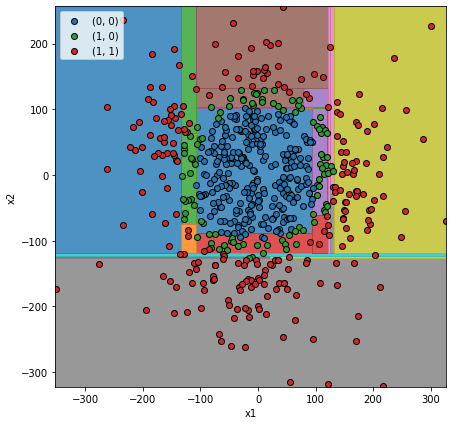

In [51]:
plot_tree_leafs_for_class(model, comparer.class_names, comparer.difference_class_names, X, mclass_diff, comparer.class_names, feature_names)

### Evaluation

In [52]:
constraints_10 = [constraint for constraint, label in zip(constraints, labels) if label == comparer.check_class('(1, 0)')[0]]

In [53]:
instance_indices_per_rule_10 = [dataset for dataset, label in zip(instance_indices_per_rule, labels) if label == comparer.check_class('(1, 0)')[0]]

#### Global Fidelity

In [54]:
evaluate(model, X, mclass_diff, comparer.class_names)

              precision    recall  f1-score   support

      (0, 0)       0.95      0.98      0.96       259
      (1, 0)       0.89      0.86      0.87       101
      (1, 1)       1.00      0.98      0.99       240

    accuracy                           0.96       600
   macro avg       0.94      0.94      0.94       600
weighted avg       0.96      0.96      0.96       600



#### Counterfactual Fidelity Error

In [55]:
errors, rmse, boundary_miss_rate, boundary_add_rate = \
    evaluate_counterfactual_fidelity(comparer, ground_truth_instance_indices_10, ground_truth_10, instance_indices_per_rule_10, constraints_10)

In [56]:
rmse

x1    35.852461
x2    24.133407
dtype: float64

In [57]:
boundary_miss_rate

x1    0.011494
x2    0.017241
dtype: float64

In [58]:
boundary_add_rate

x1    0.0
x2    0.0
dtype: float64

#### Complexity

In [59]:
print_complexity(constraints_10)

Number of rules: 6
Number of constraints: 22 (3.7 per rule)


# Summary

## Global Fidelity

This interpretability method fails to generate a simple, global explanation. Instead, it is very similar to the local level explanation.

Ruleset | Precision | Recall | F1
 --- | --- | --- | ---
10/global | 86\% | 66\% | 75\%
10/local | 89\% | 86\% | 87\%

## Counterfactual Fidelity Error

Ruleset | RMSE | boundaries missed | unnecessary boundaries
 --- | --- | --- | ---
10/global | 38.2 | 1.9\% | 0\%
10/local | 30.6 | 1.4\% | 0\%

## Complexity

Ruleset | # Rules | # Constraints
 --- | --- | ---
10/global | 5 | 18
10/local | 6 | 22

## Generation Time

<1s